In [72]:
import numpy as np

In [73]:
import pandas as pd

In [74]:
inputfile = "..\\..\\experiments\\2019-06-29_190506\\aggregate_results.txt"
df = pd.read_csv(inputfile, sep='\t')

In [75]:
df['instance'].unique()

array(['wil100.dat', 'tho40.dat', 'ste36c.dat', 'tai60b.dat',
       'tai80b.dat', 'sko49.dat', 'sko100d.dat', 'nug30.dat',
       'tai150b.dat', 'tho150.dat'], dtype=object)

In [76]:
df.head()

,instance,size,seed,finalCost,populationSize,maxGenerations,recombineOp,distanceFunc,entropyReduceFunc,mutate,executionTime,numIndividuals,finalEntropy,numGenerations,bestKnownCost,gap
0,wil100.dat,100,1,285492,100,10000000000,order1cx,hamming,Statistics.mean,cyclicHeuristic,120.025,57,7.236216,589,273038,"[0.084274, 0.0788095, 0.0772786, 0.0772786, 0...."
1,wil100.dat,100,2,284656,100,10000000000,order1cx,hamming,Statistics.mean,cyclicHeuristic,120.069,59,6.275862,648,273038,"[0.0817469, 0.0790806, 0.0756378, 0.0756378, 0..."
2,wil100.dat,100,3,286462,100,10000000000,order1cx,hamming,Statistics.mean,cyclicHeuristic,120.044,55,6.682828,592,273038,"[0.0828236, 0.078436, 0.078436, 0.0746636, 0.0..."
3,wil100.dat,100,4,286754,100,10000000000,order1cx,hamming,Statistics.mean,cyclicHeuristic,120.063,63,7.228879,614,273038,"[0.0823548, 0.0778646, 0.07544, 0.07544, 0.075..."
4,wil100.dat,100,5,286174,100,10000000000,order1cx,hamming,Statistics.mean,cyclicHeuristic,120.101,67,14.611488,534,273038,"[0.0832924, 0.0808679, 0.0789853, 0.0771321, 0..."


In [77]:
df['gap'] = (df['finalCost'] - df['bestKnownCost']) / df['bestKnownCost']

In [78]:
last_duplicate = df.duplicated(subset=['instance','seed','populationSize','recombineOp'], keep='first')
df['selection'] = ''
df.loc[last_duplicate,'selection'] = 'biasedFitnessSelection'
df.loc[~last_duplicate,'selection'] = 'fitnessSelection'

In [79]:
df[df['instance'] == 'wil100.dat']

,instance,size,seed,finalCost,populationSize,maxGenerations,recombineOp,distanceFunc,entropyReduceFunc,mutate,executionTime,numIndividuals,finalEntropy,numGenerations,bestKnownCost,gap,selection
0,wil100.dat,100,1,285492,100,10000000000,order1cx,hamming,Statistics.mean,cyclicHeuristic,120.025,57,7.236216,589,273038,0.045613,fitnessSelection
1,wil100.dat,100,2,284656,100,10000000000,order1cx,hamming,Statistics.mean,cyclicHeuristic,120.069,59,6.275862,648,273038,0.042551,fitnessSelection
2,wil100.dat,100,3,286462,100,10000000000,order1cx,hamming,Statistics.mean,cyclicHeuristic,120.044,55,6.682828,592,273038,0.049165,fitnessSelection
3,wil100.dat,100,4,286754,100,10000000000,order1cx,hamming,Statistics.mean,cyclicHeuristic,120.063,63,7.228879,614,273038,0.050235,fitnessSelection
4,wil100.dat,100,5,286174,100,10000000000,order1cx,hamming,Statistics.mean,cyclicHeuristic,120.101,67,14.611488,534,273038,0.048111,fitnessSelection
5,wil100.dat,100,1,286316,200,10000000000,order1cx,hamming,Statistics.mean,cyclicHeuristic,120.314,129,11.723353,227,273038,0.048631,fitnessSelection
6,wil100.dat,100,2,287880,200,10000000000,order1cx,hamming,Statistics.mean,cyclicHeuristic,120.235,198,82.439727,203,273038,0.054359,fitnessSelection
7,wil100.dat,100,3,284470,200,10000000000,order1cx,hamming,Statistics.mean,cyclicHeuristic,120.304,175,30.949294,207,273038,0.041870,fitnessSelection
8,wil100.dat,100,4,287046,200,10000000000,order1cx,hamming,Statistics.mean,cyclicHeuristic,120.133,195,62.233043,205,273038,0.051304,fitnessSelection
9,wil100.dat,100,5,286248,200,10000000000,order1cx,hamming,Statistics.mean,cyclicHeuristic,120.280,118,7.365204,244,273038,0.048382,fitnessSelection


In [80]:
assert sum(df.duplicated(subset=['instance','seed','populationSize','recombineOp','selection'])) == 0

In [82]:
tmp = df.groupby(['instance','populationSize','recombineOp','selection']) \
        [['finalCost','executionTime','bestKnownCost']].mean().reset_index()
tmp

,instance,populationSize,recombineOp,selection,finalCost,executionTime,bestKnownCost
0,nug30.dat,100,PMXcx,biasedFitnessSelection,6316.4,120.0254,6124.0
1,nug30.dat,100,PMXcx,fitnessSelection,6411.6,120.0060,6124.0
2,nug30.dat,100,cyclecx,biasedFitnessSelection,6414.4,120.0248,6124.0
3,nug30.dat,100,cyclecx,fitnessSelection,6546.8,120.0154,6124.0
4,nug30.dat,100,order1cx,biasedFitnessSelection,6475.6,120.0258,6124.0
5,nug30.dat,100,order1cx,fitnessSelection,6559.6,120.0104,6124.0
6,nug30.dat,200,PMXcx,biasedFitnessSelection,6348.4,120.1102,6124.0
7,nug30.dat,200,PMXcx,fitnessSelection,6304.0,120.0200,6124.0
8,nug30.dat,200,cyclecx,biasedFitnessSelection,6341.6,120.1164,6124.0
9,nug30.dat,200,cyclecx,fitnessSelection,6376.0,120.0208,6124.0


In [90]:
df['experiment'] = df['populationSize'].astype(str) + '-' + df['recombineOp'] + '-' + df['selection']

In [106]:
df[(df['instance'] == 'nug30.dat') 
   & (df['recombineOp'] == 'PMXcx') 
   & (df['populationSize'] == 100) 
   & (df['selection'] == 'biasedFitnessSelection')][['finalCost','bestKnownCost']].mean()

finalCost        6316.4
bestKnownCost    6124.0
dtype: float64

In [111]:
table = pd.pivot_table(df, values='finalEntropy', index=['instance'],
                    columns=['selection','recombineOp','populationSize'], #['experiment'], 
                    aggfunc=np.mean)
table.to_clipboard(sep='\t')
table

selection      biasedFitnessSelection                                     \
recombineOp                     PMXcx                            cyclecx   
populationSize                    100         200         500        100   
instance                                                                   
nug30.dat                   10.054467   13.284728   28.927824  11.794696   
sko100d.dat                 13.545753   90.940986   98.961339  17.323581   
sko49.dat                    8.086713   12.962436   47.975248  13.195103   
ste36c.dat                   7.913757   20.441596   34.909241  10.819032   
tai150b.dat                136.260404  148.213808  148.983721  74.771981   
tai60b.dat                   7.487202   12.489782   58.169508   9.964500   
tai80b.dat                   7.431037   70.235393   78.854677   7.532767   
tho150.dat                        NaN         NaN         NaN        NaN   
tho40.dat                    8.543162   15.896882   38.955147  16.063764   
wil100.dat                   6.769188   96.022534   98.937908  17.149140   

selection                                                                   \
recombineOp                               order1cx                           
populationSize         200         500         100         200         500   
instance                                                                     
nug30.dat        14.202427   27.761566   11.190270   28.665973   28.962413   
sko100d.dat      49.426098   98.547139   85.226340   98.833226   98.993725   
sko49.dat        16.631701   47.359512   12.482424   42.966114   47.992736   
ste36c.dat       11.605180   32.464221   28.457206   34.603227   34.930736   
tai150b.dat     136.663176  148.622102  148.373818  148.910312  149.002572   
tai60b.dat       10.018321   55.097748    6.955762   41.051564   58.586094   
tai80b.dat       10.974204   75.611275   15.534728   74.803278   78.945403   
tho150.dat             NaN         NaN         NaN         NaN         NaN   
tho40.dat        14.858638   38.102847   16.454437   34.518145   38.973967   
wil100.dat       53.401072   98.182650   85.597120   98.484784   98.985374   

selection      fitnessSelection                                     \
recombineOp               PMXcx                            cyclecx   
populationSize              100         200         500        100   
instance                                                             
nug30.dat              6.461810    7.267609    9.166256   9.883731   
sko100d.dat            6.258403   16.916216   93.442042  15.899188   
sko49.dat              6.494205    7.293765    8.834049  11.224027   
ste36c.dat             6.525938    7.224893    8.941053  11.486483   
tai150b.dat           49.790866  131.736707  148.812213  31.674767   
tai60b.dat             5.541431    6.573095   12.772348  11.342610   
tai80b.dat             6.052878    6.649178   49.165124  12.984674   
tho150.dat            56.443140  122.811487  148.854974  70.471919   
tho40.dat              6.170221    7.356732    8.917781  11.217199   
wil100.dat             6.186221    7.555304   86.841220  12.785241   

selection                                                                   
recombineOp                               order1cx                          
populationSize         200         500         100         200         500  
instance                                                                    
nug30.dat         9.862261   10.773905    6.988499    7.935252   10.057229  
sko100d.dat      16.139763   64.637361    8.811274   55.809814   97.881661  
sko49.dat        13.566497   14.027935    6.545362    7.324726   11.650605  
ste36c.dat       11.139659   10.843020    6.467155    8.649103   10.079275  
tai150b.dat     112.534517  146.747423  115.334147  147.205509  148.856446  
tai60b.dat       10.619780   10.881162    7.011347    9.401913   15.516906  
tai80b.dat       12.208588   29.390521    7.791775    9.044673   66.317975  
tho150.dat    

In [83]:
pivot_table(df, values=['finalCost', 'executionTime', 'gap'], 
            index=['instance'], aggfunc={'instance': np.mean,'E': np.mean})

,instance,populationSize,recombineOp,selection,finalCost,executionTime,bestKnownCost
0,nug30.dat,100,PMXcx,biasedFitnessSelection,6316.4,120.0254,6124.0
1,nug30.dat,100,PMXcx,fitnessSelection,6411.6,120.0060,6124.0
2,nug30.dat,100,cyclecx,biasedFitnessSelection,6414.4,120.0248,6124.0
3,nug30.dat,100,cyclecx,fitnessSelection,6546.8,120.0154,6124.0
4,nug30.dat,100,order1cx,biasedFitnessSelection,6475.6,120.0258,6124.0
5,nug30.dat,100,order1cx,fitnessSelection,6559.6,120.0104,6124.0
6,nug30.dat,200,PMXcx,biasedFitnessSelection,6348.4,120.1102,6124.0
7,nug30.dat,200,PMXcx,fitnessSelection,6304.0,120.0200,6124.0
8,nug30.dat,200,cyclecx,biasedFitnessSelection,6341.6,120.1164,6124.0
9,nug30.dat,200,cyclecx,fitnessSelection,6376.0,120.0208,6124.0


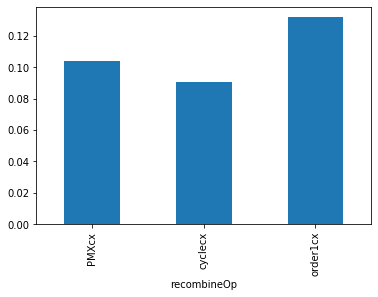

In [56]:
%matplotlib inline
tmp.groupby('recombineOp')['gap'].mean().plot(kind='bar')

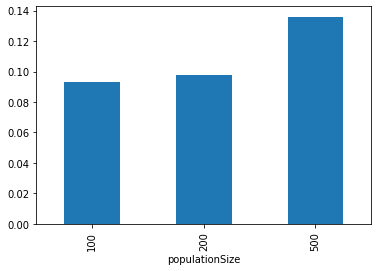

In [57]:
tmp.groupby('populationSize')['gap'].mean().plot(kind='bar')

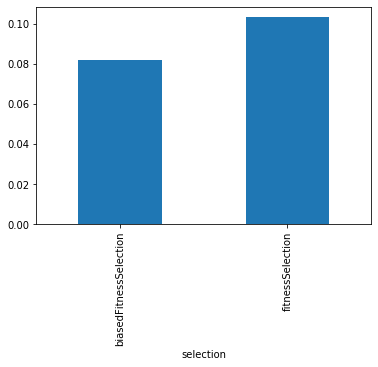

In [60]:
tmp[tmp['populationSize'] == 100].groupby('selection')['gap'].mean().plot(kind='bar')

# Local Search

In [112]:
inputfile = "..\\..\\experiments\\local_search_results.txt"
df = pd.read_csv(inputfile, sep='\t')

In [116]:
df.head()

,instance,size,seed,finalCost,executionTime,numTrials,bestKnownCost,gap
0,wil100.dat,100,1,275316,126.630,7,273038,0.008343
1,tho40.dat,40,1,244426,120.071,770,240516,0.016257
2,ste36c.dat,36,1,8330578,120.025,1060,8239110,0.011102
3,tai60b.dat,60,1,620320909,121.695,82,608215054,0.019904
4,tai80b.dat,80,1,841608362,120.634,18,818415043,0.028339


In [121]:
df.groupby('instance')[['finalCost','gap','executionTime','numTrials']].mean()

,finalCost,gap,executionTime,numTrials
instance,,,,
bur26a.dat,5.426670e+06,0.000000,30.918200,1272.600000
bur26e.dat,5.386879e+06,0.000000,28.090200,1100.200000
chr15a.dat,9.896000e+03,0.000000,24.423000,14815.600000
chr20c.dat,1.414200e+04,0.000000,5.850000,866.250000
els19.dat,1.721255e+07,0.000000,0.696000,106.750000
esc128.dat,6.440000e+01,0.006250,99.485000,11.200000
esc16h.dat,9.960000e+02,0.000000,24.000600,23801.000000
esc32e.dat,2.000000e+00,0.000000,24.011600,2719.800000
lipa40b.dat,4.765810e+05,0.000000,12.327750,103.000000
